In [10]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from prophet import Prophet

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score
%matplotlib inline
 
plt.rcParams['figure.figsize']=(20,10)
# plt.style.use('ggplot')

In [3]:
df = pd.read_csv("D:\Electric_Consumption_And_Cost__2010_-_April_2020_.csv")
df.head()

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17,24) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Development Name,Borough,Account Name,Location,Meter AMR,Meter Scope,TDS #,EDP,RC Code,Funding Source,...,Meter Number,Estimated,Current Charges,Rate Class,Bill Analyzed,Consumption (KWH),KWH Charges,Consumption (KW),KW Charges,Other charges
0,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"15,396.82",GOV/NYC/068,Yes,"128,800","7,387.97",216,"2,808","5,200.85"
1,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"14,556.34",GOV/NYC/068,Yes,"115,200","6,607.87",224,"2,912","5,036.47"
2,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"13,904.98",GOV/NYC/068,Yes,"103,200","5,919.55",216,"2,808","5,177.43"
3,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"14,764.04",GOV/NYC/068,Yes,"105,600","6,057.22",208,"2,704","6,002.82"
4,ADAMS,BRONX,ADAMS,BLD 05,NONE,BLD 01 to 07,118.0,248,B011800,FEDERAL,...,7223256,N,"13,729.54",GOV/NYC/068,Yes,"97,600","5,598.34",216,"2,808","5,323.2"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362630 entries, 0 to 362629
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Development Name    361947 non-null  object 
 1   Borough             362630 non-null  object 
 2   Account Name        362630 non-null  object 
 3   Location            353112 non-null  object 
 4   Meter AMR           362476 non-null  object 
 5   Meter Scope         19106 non-null   object 
 6   TDS #               360690 non-null  float64
 7   EDP                 362630 non-null  int64  
 8   RC Code             362630 non-null  object 
 9   Funding Source      362630 non-null  object 
 10  AMP #               360744 non-null  object 
 11  Vendor Name         362630 non-null  object 
 12  UMIS BILL ID        362630 non-null  int64  
 13  Revenue Month       362630 non-null  object 
 14  Service Start Date  362622 non-null  object 
 15  Service End Date    362622 non-nul

In [5]:
#Taking Service start date and Consumption(KW) as our two variables for the time series analysis and renaming the columns

df = df[['Service Start Date','Consumption (KW)']].copy()

df.columns=['ds','y']
print(df.head())

           ds    y
0  12/24/2009  216
1  01/26/2010  224
2  02/25/2010  216
3  03/26/2010  208
4  04/26/2010  216


In [6]:
df.isnull().sum()

ds    8
y     0
dtype: int64

In [7]:
#Since there are null values, we will drop those rows (only 8 in 337K rows) and also remove comma separator from y field
df1 = df.dropna()
df1 = df1.replace(',' ,'', regex=True)
df1.head()

,ds,y
0,12/24/2009,216
1,01/26/2010,224
2,02/25/2010,216
3,03/26/2010,208
4,04/26/2010,216


In [8]:
#Changing the datatypes to datetime for ds and numeric for y column
df1['ds'] = pd.to_datetime(df1['ds'])
df1['y'] = pd.to_numeric(df1['y'])

print(df1.head())
df1.info()

          ds      y
0 2009-12-24  216.0
1 2010-01-26  224.0
2 2010-02-25  216.0
3 2010-03-26  208.0
4 2010-04-26  216.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 362622 entries, 0 to 362629
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   ds      362622 non-null  datetime64[ns]
 1   y       362622 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.3 MB


<AxesSubplot:xlabel='ds'>

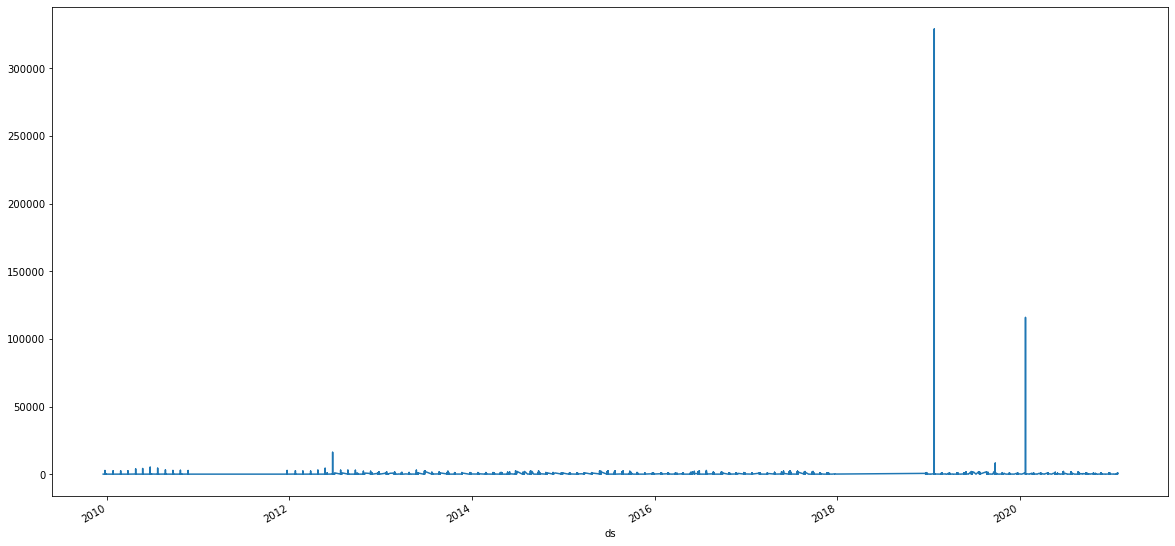

In [11]:
df1.set_index('ds').y.plot()

In [12]:
model = Prophet()
#default forecasting growth - linear
model.fit(df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
#For daily forecasts 100/200/365 days into future

future_date1 = model.make_future_dataframe(periods = 100,freq = "D")
future_date2 = model.make_future_dataframe(periods = 200,freq = "D")
future_date3 = model.make_future_dataframe(periods = 365,freq = "D")

In [14]:
future_date1.tail()

,ds
683,2021-05-03
684,2021-05-04
685,2021-05-05
686,2021-05-06
687,2021-05-07


In [15]:
# Making predictions about future days

prediction100 = model.predict(future_date1)
prediction200 = model.predict(future_date2)
prediction365 = model.predict(future_date3)


In [16]:
#Predictions in tabular format
prediction100[['ds','yhat']].tail()

,ds,yhat
683,2021-05-03,50.562738
684,2021-05-04,48.248897
685,2021-05-05,46.437636
686,2021-05-06,47.674630
687,2021-05-07,44.766474


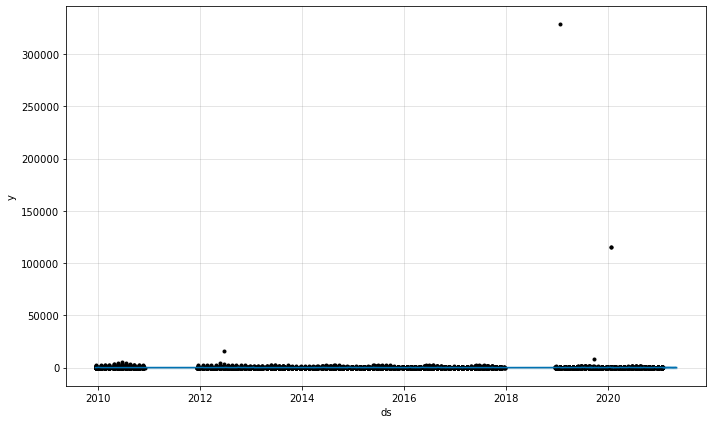

In [17]:
fig100 = model.plot(prediction100)

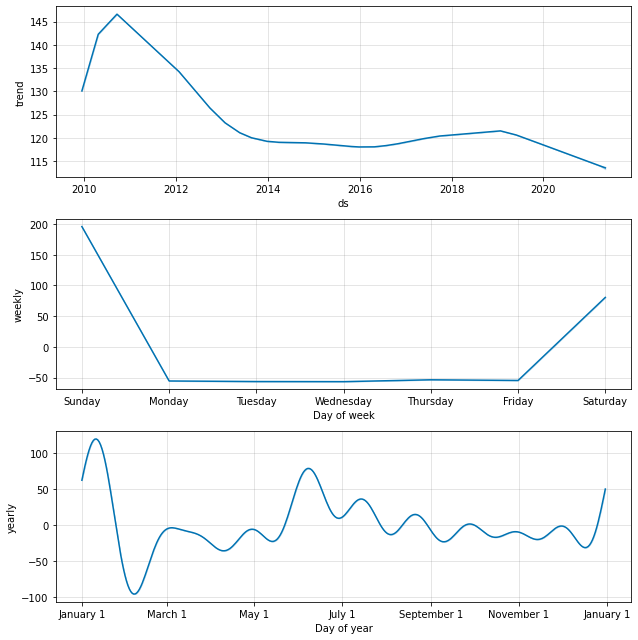

In [18]:
#plot components of prediction
fg = model.plot_components(prediction100)

In [19]:
#R2 score, Mean absolute error and Mean Absolute Percentage Error
#First we need to create a combined dataframe with yhat from prediction and original y values

metric_df = prediction100.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()
metric_df.tail()

,ds,yhat,y
362717,2021-05-03,50.562738,NaN
362718,2021-05-04,48.248897,NaN
362719,2021-05-05,46.437636,NaN
362720,2021-05-06,47.674630,NaN
362721,2021-05-07,44.766474,NaN


In [20]:
metric_df.dropna(inplace=True)
metric_df.tail()

,ds,yhat,y
362617,2021-01-26,40.992597,141.24
362618,2021-01-26,40.992597,0.00
362619,2021-01-26,40.992597,0.00
362620,2021-01-26,40.992597,0.00
362621,2021-01-27,28.715583,655.00


In [21]:
print("r2 score is:",r2_score(metric_df.y, metric_df.yhat))
print("Mean  absolute error is:",mean_absolute_error(metric_df.y, metric_df.yhat))
print("Mean absolute percentage error is:",mean_absolute_percentage_error(metric_df.y, metric_df.yhat))

r2 score is: 0.0006721260803619344
Mean  absolute error is: 66.8276015690284
Mean absolute percentage error is: 1.1675797787640709e+17


In [22]:
# from prophet.plot import plot_plotly, plot_components_plotly
# fig200 = plot_plotly(model,prediction200)

In [23]:
#Predictions in tabular format
prediction200[['ds','yhat']].tail()

,ds,yhat
783,2021-08-11,54.288856
784,2021-08-12,59.856504
785,2021-08-13,61.367053
786,2021-08-14,198.996674
787,2021-08-15,316.628315


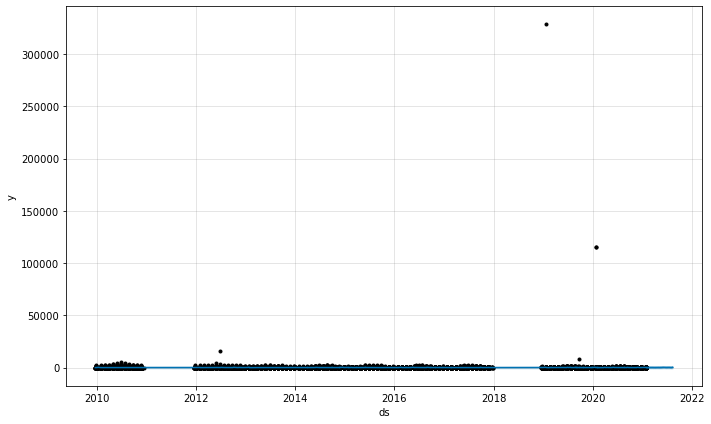

In [24]:
fig200 = model.plot(prediction200)

In [25]:
#Calculating the metrics for 200 days
metric_df200 = prediction200.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()
metric_df200.dropna(inplace=True)
print("r2 score is:",r2_score(metric_df200.y, metric_df200.yhat))
print("Mean  absolute error is:",mean_absolute_error(metric_df200.y, metric_df200.yhat))
print("Mean absolute percentage error is:",mean_absolute_percentage_error(metric_df200.y, metric_df200.yhat))

r2 score is: 0.0006721260803619344
Mean  absolute error is: 66.8276015690284
Mean absolute percentage error is: 1.1675797787640709e+17


In [72]:
# from prophet.plot import plot_plotly, plot_components_plotly
# fig200 = plot_plotly(model,prediction200)

In [26]:
#Calculating the metrics for 365 days
metric_df365 = prediction365.set_index('ds')[['yhat']].join(df1.set_index('ds').y).reset_index()
metric_df365.dropna(inplace=True)
print("r2 score is:",r2_score(metric_df365.y, metric_df365.yhat))
print("Mean  absolute error is:",mean_absolute_error(metric_df365.y, metric_df365.yhat))
print("Mean absolute percentage error is:",mean_absolute_percentage_error(metric_df365.y, metric_df365.yhat))

r2 score is: 0.0006721260803619344
Mean  absolute error is: 66.8276015690284
Mean absolute percentage error is: 1.1675797787640709e+17


Tuning FBProphet model - forecasting growth

In [27]:
#finding outliers in y and removing them 
df1.describe()

,y
count,362622.000000
mean,64.580894
std,620.520214
min,0.000000
25%,0.000000
50%,25.500000
75%,92.160000
max,329074.000000


In [28]:
new_df1 = df1[(df1['y'] <= 30000)]

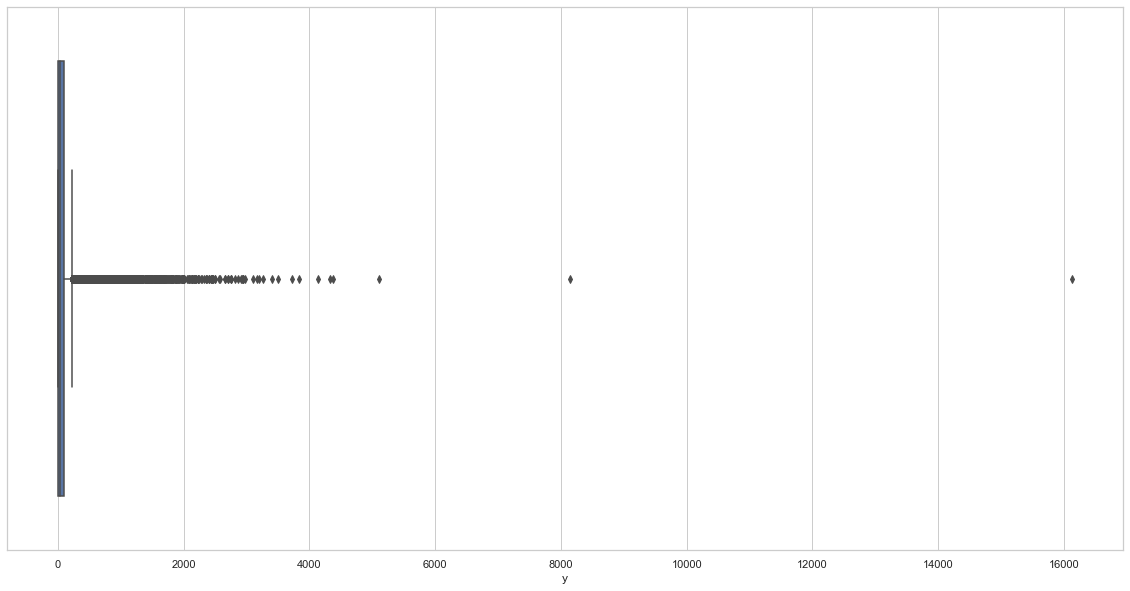

In [31]:
sns.set_theme(style="whitegrid")
a1 = sns.boxplot(x=new_df1['y'])

In [30]:
m = Prophet(growth='flat')
m.fit(new_df1)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [32]:
#prediction with tuned model for 365 days in future
prediction_tune1 = m.predict(future_date3)

In [33]:
prediction_tune1[['ds','yhat']].tail()

,ds,yhat
948,2022-01-23,291.016574
949,2022-01-24,52.566584
950,2022-01-25,49.298458
951,2022-01-26,56.124816
952,2022-01-27,56.405024


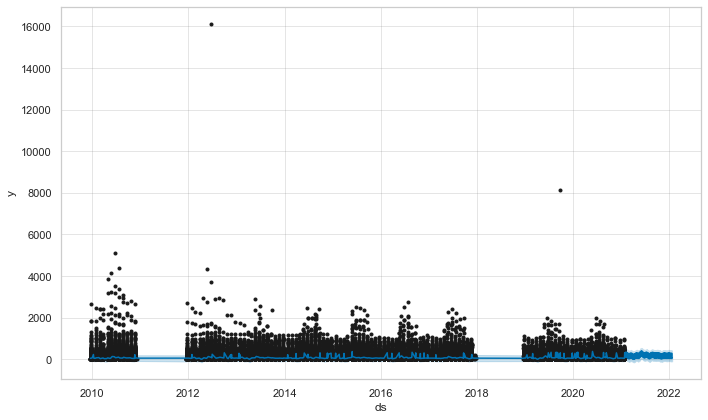

In [34]:
fig_tune1 = m.plot(prediction_tune1)

In [35]:
#Calculate metrics 
metric_tune1 = prediction_tune1.set_index('ds')[['yhat']].join(new_df1.set_index('ds').y).reset_index()
metric_tune1.dropna(inplace=True)
print("r2 score is:",r2_score(metric_tune1.y, metric_tune1.yhat))
print("Mean  absolute error is:",mean_absolute_error(metric_tune1.y, metric_tune1.yhat))
print("Mean absolute percentage error is:",mean_absolute_percentage_error(metric_tune1.y, metric_tune1.yhat))

r2 score is: 0.016334103691340918
Mean  absolute error is: 64.87981001870558
Mean absolute percentage error is: 1.15643962324851e+17


Tuning FBProphet model - seasonality

In [36]:
m = Prophet(daily_seasonality=False).add_seasonality(name = "daily", period = 1, fourier_order =15).fit(new_df1)
predictions_tune2 = m.predict(future_date3)

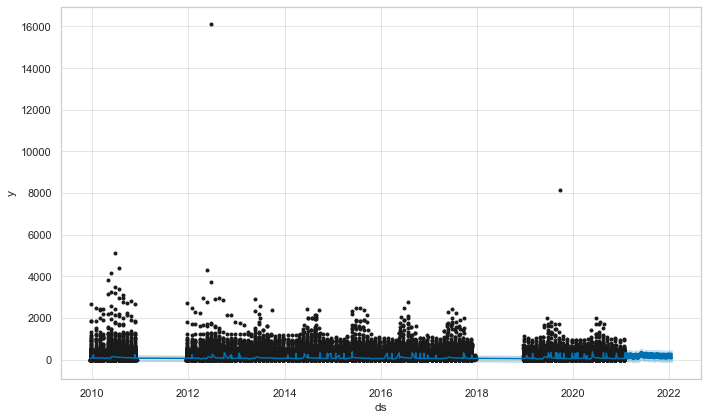

In [37]:
m.plot(predictions_tune2)
plt.show()

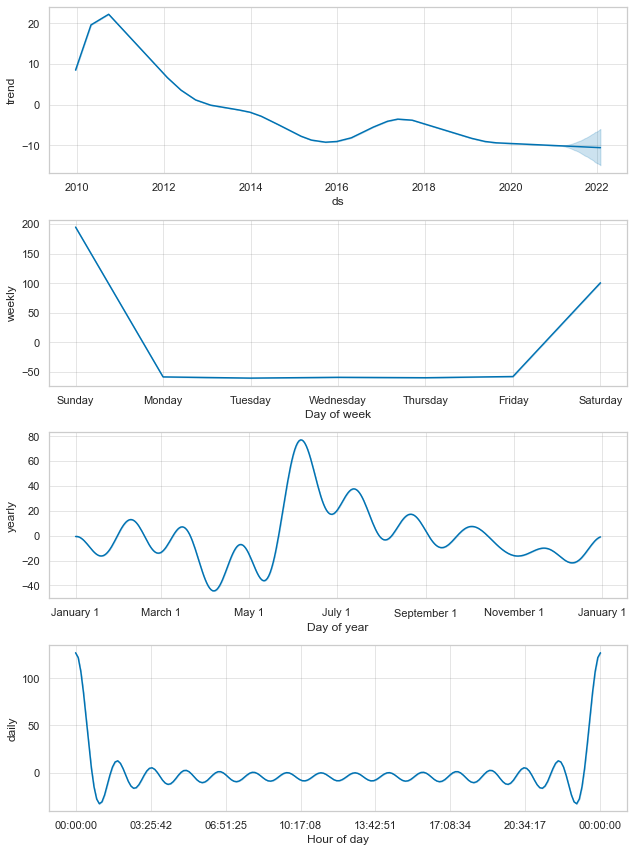

In [38]:
ab = m.plot_components(predictions_tune2)

In [44]:
#add changepoints
from prophet.plot import add_changepoints_to_plot

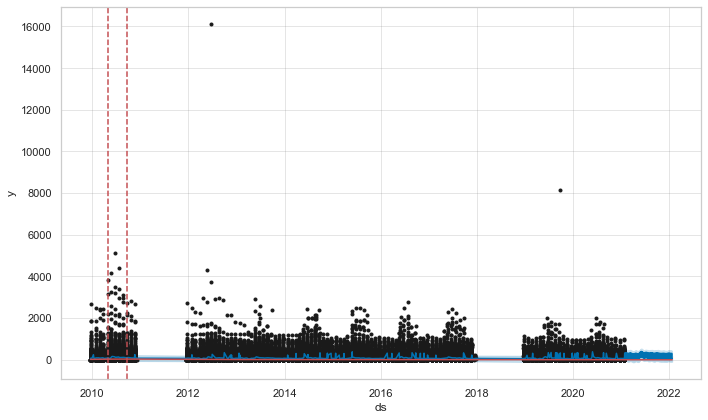

In [43]:
fig = m.plot(predictions_tune2)
a = add_changepoints_to_plot(fig.gca(),m,predictions_tune2)

In [45]:
m = Prophet(n_changepoints=25)
m.fit(new_df1)
predictions_tune3 = m.predict(future_date3)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


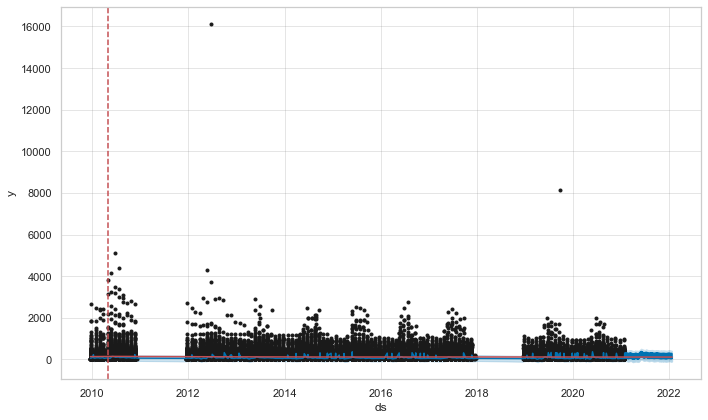

In [46]:
fig = m.plot(predictions_tune3)
a = add_changepoints_to_plot(fig.gca(),m,predictions_tune3)

In [65]:
new_df2 = new_df1[(new_df1['y'] <= 8000)]

<AxesSubplot:xlabel='ds'>

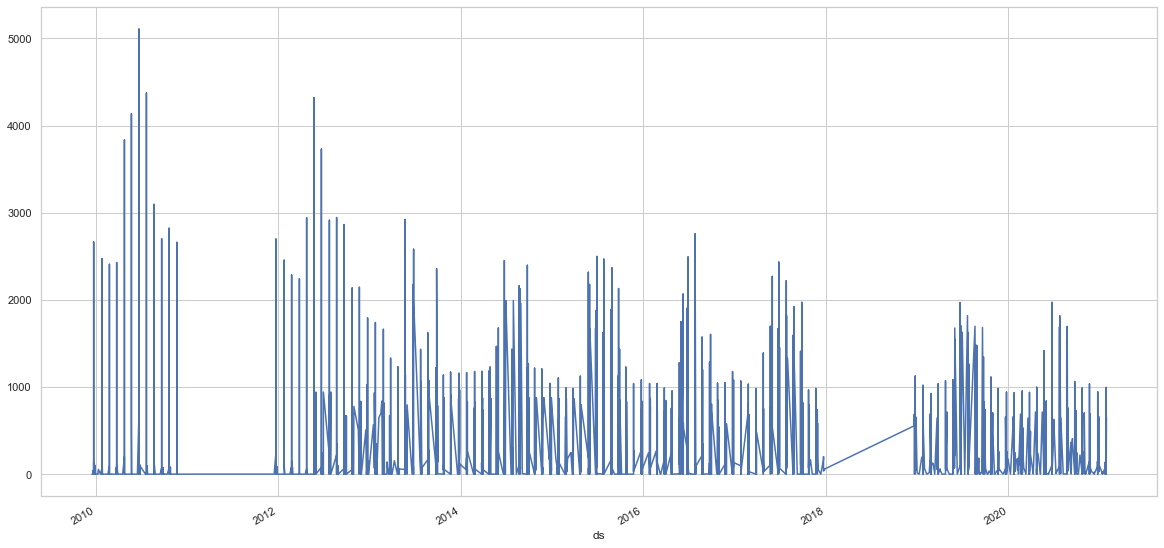

In [67]:
new_df2.set_index('ds').y.plot()